In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [76]:
data = pd.read_csv("Lead Scoring.csv")

In [78]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [82]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [84]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [86]:
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [88]:
data = data.drop(columns=['Prospect ID','Lead Number'])

In [108]:
cat_cols = data.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

In [110]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [112]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [114]:
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [116]:
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,Select,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


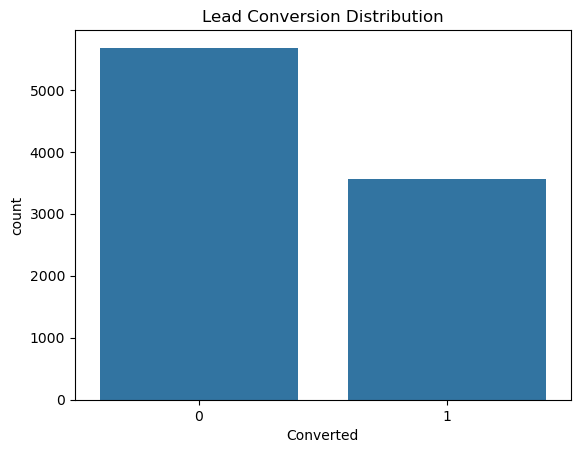

In [120]:
sns.countplot(x='Converted', data=data)
plt.title('Lead Conversion Distribution')
plt.show()

In [122]:
Conversion_rate = data['Converted'].value_counts(normalize=True) * 100


In [124]:
Conversion_rate

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64

In [126]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())


Lead Origin value counts:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source value counts:
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Do Not Email value counts:
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Do Not Call value counts:
Do Not Call
No     9238
Yes       2
Name: coun

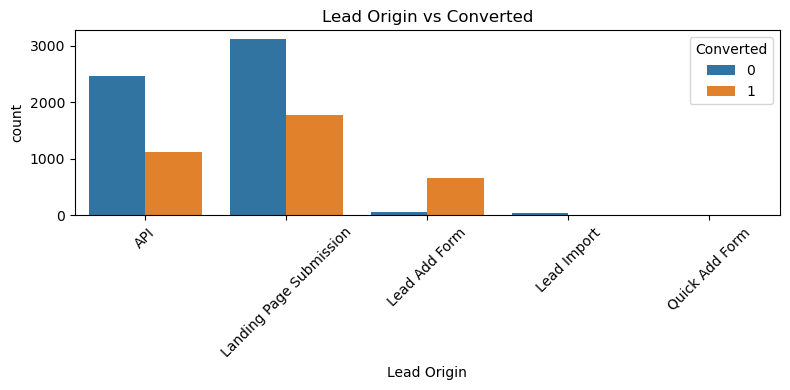

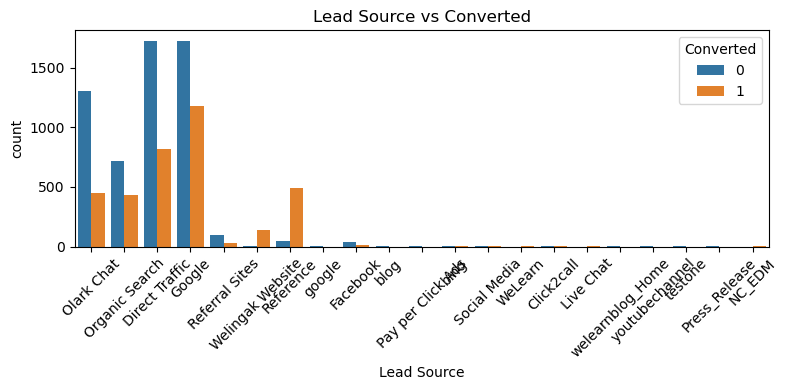

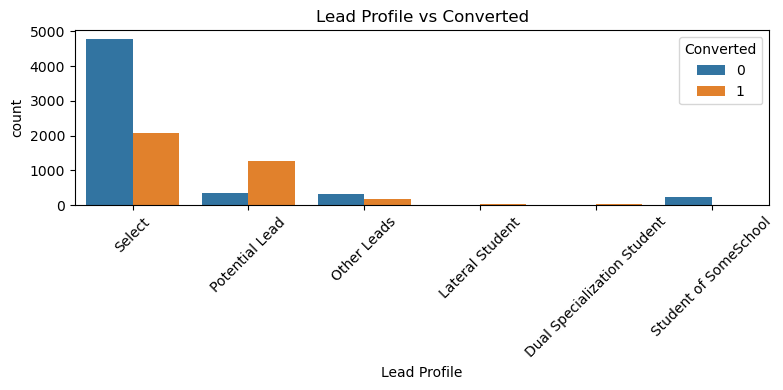

In [128]:
important_cat_cols = ['Lead Origin', 'Lead Source', 'Lead Profile']

for col in important_cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=col, hue='Converted')
    plt.title(f'{col} vs Converted')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


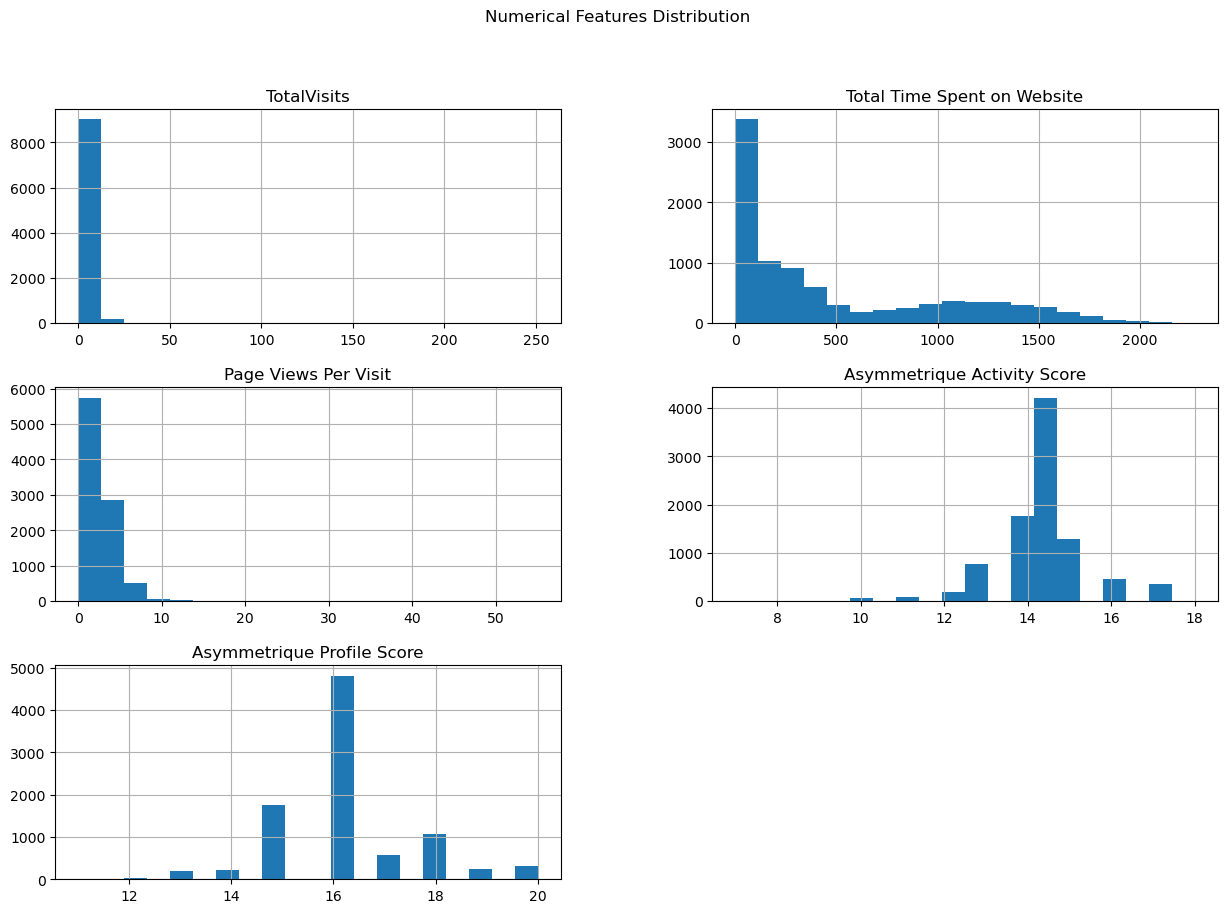

In [130]:
num_cols = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Converted']).columns

data[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Numerical Features Distribution')
plt.show()


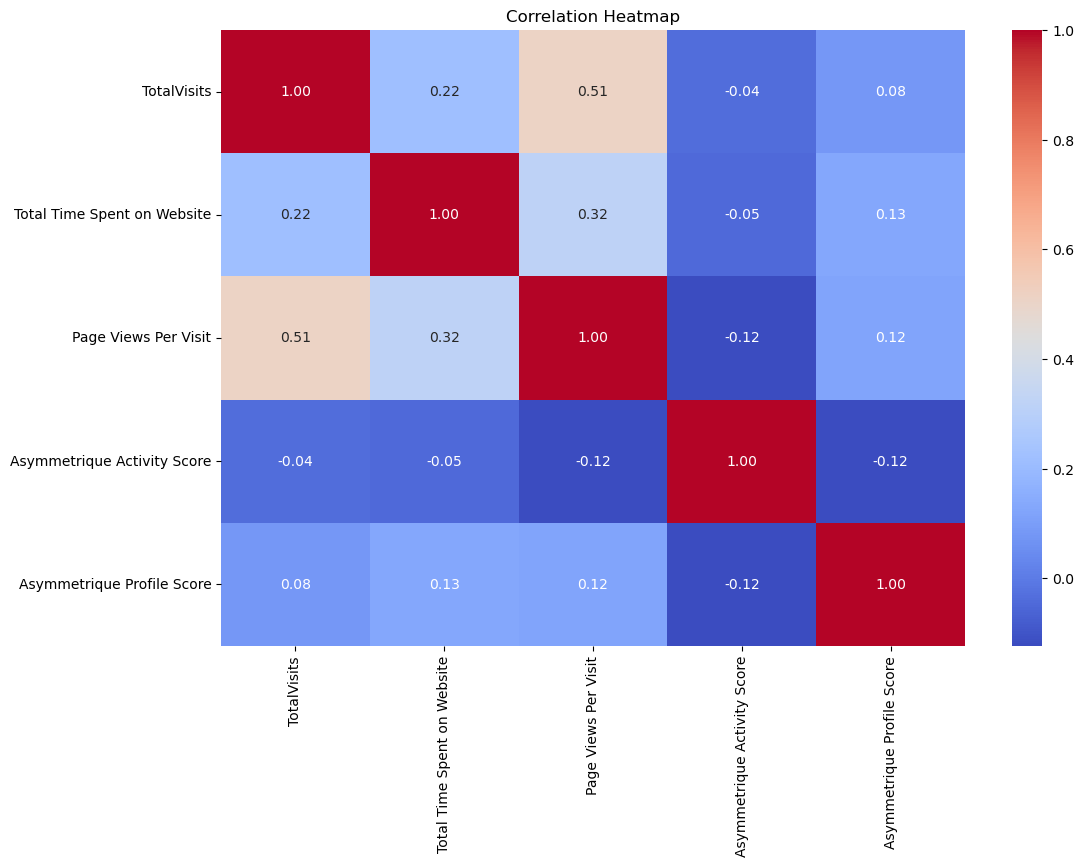

In [136]:
num_data = data[num_cols]
corr_matrix = num_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [138]:
data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,Select,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [146]:
for col in cat_cols:
    data[col] = data[col].astype(str) 
    data[col] = le.fit_transform(data[col])

In [152]:
corr_with_target = data.corr()['Converted'].drop('Converted')
top_corr_features = corr_with_target.abs().sort_values(ascending=False)

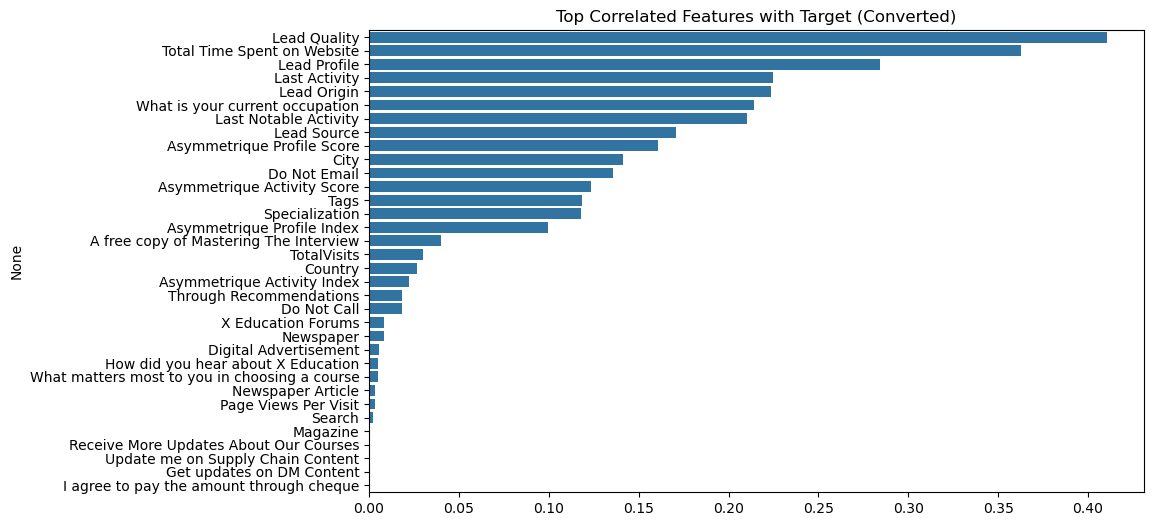

In [154]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title('Top Correlated Features with Target (Converted)')
plt.show()

In [156]:
data.to_csv("encoded_data.csv", index=False)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = data.drop("Converted", axis=1)
y = data["Converted"]
X.fillna(0, inplace=True)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [164]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

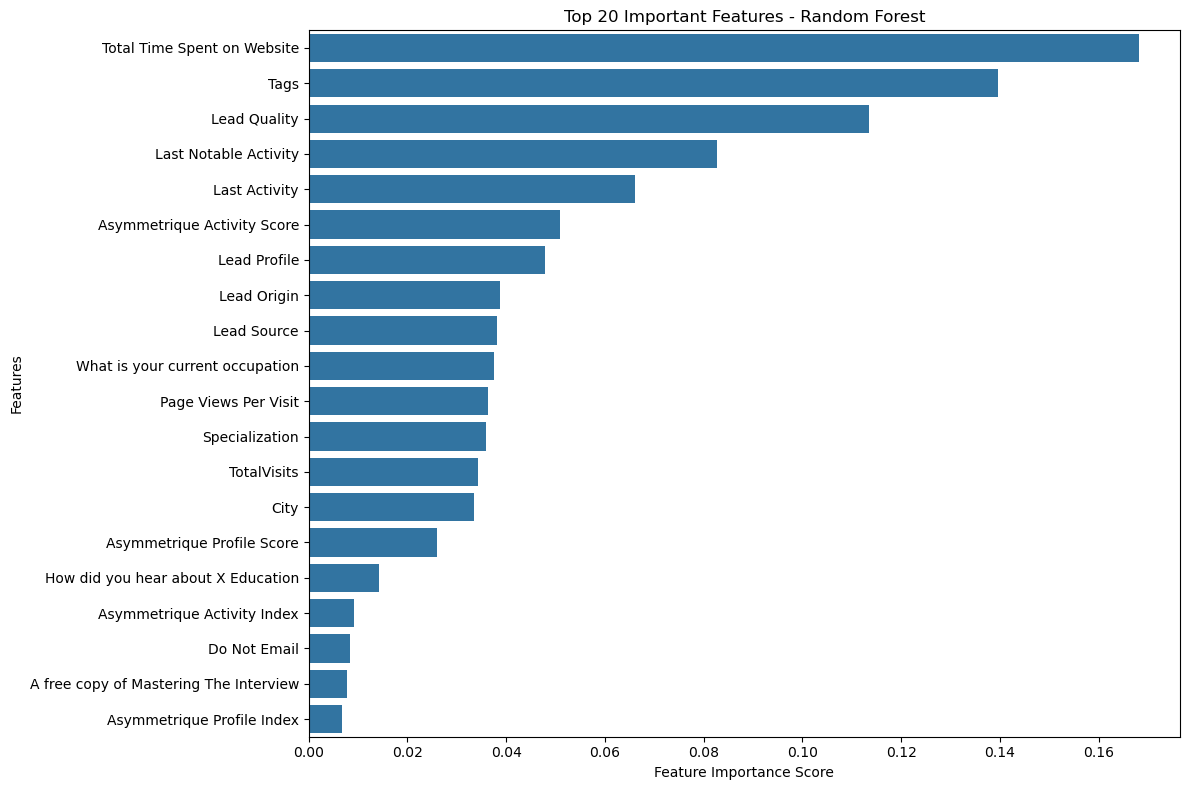

In [166]:
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_sorted[:20], y=importances_sorted.index[:20])
plt.title("Top 20 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [168]:
top_features = importances_sorted.head(20).index.tolist()
print("Top 20 Features:", top_features)

Top 20 Features: ['Total Time Spent on Website', 'Tags', 'Lead Quality', 'Last Notable Activity', 'Last Activity', 'Asymmetrique Activity Score', 'Lead Profile', 'Lead Origin', 'Lead Source', 'What is your current occupation', 'Page Views Per Visit', 'Specialization', 'TotalVisits', 'City', 'Asymmetrique Profile Score', 'How did you hear about X Education', 'Asymmetrique Activity Index', 'Do Not Email', 'A free copy of Mastering The Interview', 'Asymmetrique Profile Index']


In [174]:
final_cols = ['Total Time Spent on Website', 'Tags', 'Lead Quality', 'Last Notable Activity', 'Last Activity', 'Asymmetrique Activity Score', 'Lead Profile', 'Lead Origin', 'Lead Source', 'What is your current occupation', 'Page Views Per Visit', 'Specialization', 'TotalVisits', 'City', 'Asymmetrique Profile Score', 'How did you hear about X Education', 'Asymmetrique Activity Index', 'Do Not Email', 'A free copy of Mastering The Interview', 'Asymmetrique Profile Index','Converted']

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [178]:
df_model = data[final_cols].copy()

In [180]:
X = df_model.drop("Converted", axis=1)
y = df_model["Converted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

✅ Accuracy: 0.9247835497835498

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1107
           1       0.93      0.87      0.90       741

    accuracy                           0.92      1848
   macro avg       0.93      0.92      0.92      1848
weighted avg       0.93      0.92      0.92      1848



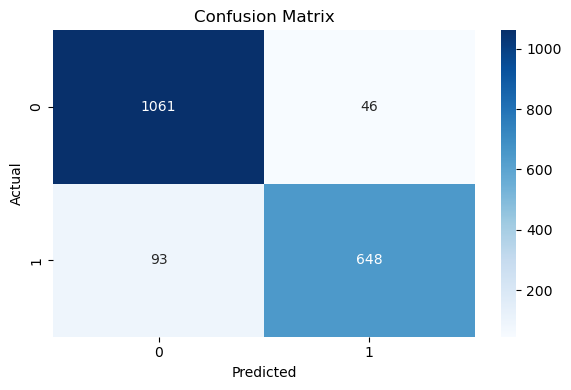

In [184]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [186]:
from xgboost import XGBClassifier, plot_importance
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

C:\Users\yasha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

✅ Accuracy: 0.9312770562770563

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1107
           1       0.93      0.90      0.91       741

    accuracy                           0.93      1848
   macro avg       0.93      0.93      0.93      1848
weighted avg       0.93      0.93      0.93      1848



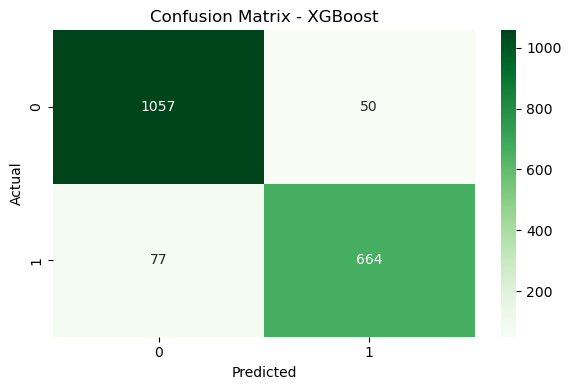

In [188]:
y_pred = xgb_model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [198]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1.0, 2.0]
}

xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("✅ Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\yasha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:11:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}


🎯 Accuracy: 0.9356060606060606

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1107
           1       0.93      0.90      0.92       741

    accuracy                           0.94      1848
   macro avg       0.94      0.93      0.93      1848
weighted avg       0.94      0.94      0.94      1848



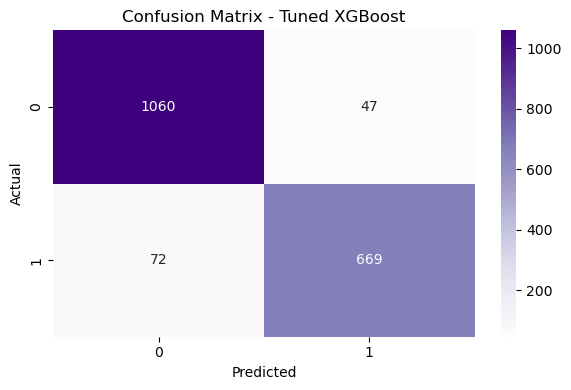

In [200]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [246]:
import joblib
joblib.dump(xgb_model, "xgb_model_converted_final_cols.joblib")

['xgb_model_converted_final_cols.joblib']

In [216]:
cd C:\Users\yasha\OneDrive\Desktop\datasets

C:\Users\yasha\OneDrive\Desktop\datasets


In [242]:
week1 = pd.read_csv('Lead Scoring_Week_1.csv')

In [248]:
model1 = joblib.load('xgb_model_converted_final_cols.joblib')

In [250]:
week1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14,20,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13,17,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15,18,No,No,Modified


In [252]:
final_features = week1[['Total Time Spent on Website', 'Tags', 'Lead Quality', 'Last Notable Activity', 'Last Activity', 'Asymmetrique Activity Score', 'Lead Profile', 'Lead Origin', 'Lead Source', 'What is your current occupation', 'Page Views Per Visit', 'Specialization', 'TotalVisits', 'City', 'Asymmetrique Profile Score', 'How did you hear about X Education', 'Asymmetrique Activity Index', 'Do Not Email', 'A free copy of Mastering The Interview', 'Asymmetrique Profile Index']]

In [258]:
final_features

,Total Time Spent on Website,Tags,Lead Quality,Last Notable Activity,Last Activity,Asymmetrique Activity Score,Lead Profile,Lead Origin,Lead Source,What is your current occupation,Page Views Per Visit,Specialization,TotalVisits,City,Asymmetrique Profile Score,How did you hear about X Education,Asymmetrique Activity Index,Do Not Email,A free copy of Mastering The Interview,Asymmetrique Profile Index
0,0,Interested in other courses,Low in Relevance,Modified,Page Visited on Website,15,Select,API,Olark Chat,Unemployed,0.0,Select,0.0,Select,15,Select,02.Medium,No,No,02.Medium
1,674,Ringing,NaN,Email Opened,Email Opened,15,Select,API,Organic Search,Unemployed,2.5,Select,5.0,Select,15,Select,02.Medium,No,No,02.Medium
2,1532,Will revert after reading the email,Might be,Email Opened,Email Opened,14,Potential Lead,Landing Page Submission,Direct Traffic,Student,2.0,Business Administration,2.0,Mumbai,20,Select,02.Medium,No,Yes,01.High
3,305,Ringing,Not Sure,Modified,Unreachable,13,Select,Landing Page Submission,Direct Traffic,Unemployed,1.0,Media and Advertising,1.0,Mumbai,17,Word Of Mouth,02.Medium,No,No,01.High
4,1428,Will revert after reading the email,Might be,Modified,Converted to Lead,15,Select,Landing Page Submission,Google,Unemployed,1.0,Select,2.0,Mumbai,18,Other,02.Medium,No,No,01.High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1085,Interested in other courses,NaN,Modified,Converted to Lead,13,Select,Landing Page Submission,Organic Search,Unemployed,2.0,Rural and Agribusiness,2.0,Other Cities of Maharashtra,14,Select,02.Medium,No,Yes,02.Medium
90,214,Interested in other courses,NaN,Modified,Page Visited on Website,15,Select,API,Organic Search,Unemployed,3.0,Select,3.0,Select,15,Select,02.Medium,No,No,02.Medium
91,1158,NaN,NaN,Email Opened,Email Opened,15,Select,API,Olark Chat,Unemployed,1.5,Business Administration,6.0,Other Cities,14,Select,02.Medium,No,Yes,02.Medium
92,101,NaN,NaN,Email Opened,Email Opened,15,NaN,Landing Page Submission,Google,NaN,4.0,Finance Management,4.0,Mumbai,18,Other,02.Medium,No,No,01.High


In [262]:
categorical_features = [
    'Tags',
    'Lead Quality',
    'Last Notable Activity',
    'Last Activity',
    'Lead Profile',
    'Lead Origin',
    'Lead Source',
    'What is your current occupation',
    'Specialization',
    'City',
    'How did you hear about X Education',
    'Asymmetrique Activity Index',
    'Do Not Email',
    'A free copy of Mastering The Interview',
    'Asymmetrique Profile Index',
    
    
]

In [264]:
le = LabelEncoder()
for col in categorical_features:
    final_features[col] = final_features[col].astype(str)  
    final_features[col] = le.fit_transform(final_features[col])

C:\Users\yasha\AppData\Local\Temp\ipykernel_6740\1816107127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_features[col] = final_features[col].astype(str)
C:\Users\yasha\AppData\Local\Temp\ipykernel_6740\1816107127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_features[col] = le.fit_transform(final_features[col])
C:\Users\yasha\AppData\Local\Temp\ipykernel_6740\1816107127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [266]:
final_features

,Total Time Spent on Website,Tags,Lead Quality,Last Notable Activity,Last Activity,Asymmetrique Activity Score,Lead Profile,Lead Origin,Lead Source,What is your current occupation,Page Views Per Visit,Specialization,TotalVisits,City,Asymmetrique Profile Score,How did you hear about X Education,Asymmetrique Activity Index,Do Not Email,A free copy of Mastering The Interview,Asymmetrique Profile Index
0,0,9,1,4,9,15,3,0,2,1,0.0,6,0.0,4,15,5,1,0,0,1
1,674,11,5,2,5,15,3,0,3,1,2.5,6,5.0,4,15,5,1,0,0,1
2,1532,12,2,2,5,14,2,1,0,0,2.0,1,2.0,0,20,5,1,0,1,0
3,305,11,3,4,10,13,3,1,0,1,1.0,2,1.0,0,17,7,1,0,0,0
4,1428,12,2,4,0,15,3,1,1,1,1.0,6,2.0,0,18,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1085,9,5,4,0,13,3,1,3,1,2.0,5,2.0,2,14,5,1,0,1,1
90,214,9,5,4,9,15,3,0,3,1,3.0,6,3.0,4,15,5,1,0,0,1
91,1158,3,5,2,5,15,3,0,2,1,1.5,1,6.0,1,14,5,1,0,1,1
92,101,3,5,2,5,15,4,1,1,3,4.0,12,4.0,0,18,4,1,0,0,0


In [278]:
week1['prediction'] = model1.predict(final_features)

In [274]:
week1['probability'] = model1.predict_proba(final_features)[:,1]

In [280]:
final_frame = week1[['Prospect ID','Lead Number','prediction','probability']]

In [282]:
final_frame

,Prospect ID,Lead Number,prediction,probability
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,1,0.803602
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0.022974
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0.165053
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0.016416
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0.200170
...,...,...,...,...
89,db6bd360-ffc9-453d-b109-b4f0cfa6749c,659630,1,0.880859
90,3f42389c-2201-4890-ae77-4958ae8982ad,659614,1,0.743875
91,e126d601-facc-4e75-b0fa-eea89ecfdea9,659607,0,0.136250
92,72064169-4b55-4279-a9b9-340872379f12,659600,0,0.074994


In [284]:
final_frame.to_csv('week1_prediction.csv')

In [294]:
week1 = pd.read_csv('Lead Scoring_Week_1.csv')

In [296]:
week1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14,20,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13,17,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15,18,No,No,Modified


In [286]:
week2 = pd.read_csv("Lead Scoring _Week_2.csv")

In [288]:
model1 = joblib.load('xgb_model_converted_final_cols.joblib')

In [290]:
week2.head()

,66a9b6ce-db45-4442-ae41-638412352b71,656939,Landing Page Submission,Google,No,No.1,8,149,2,Olark Chat Conversation,...,No.11,Unnamed: 27,Mumbai,02.Medium,01.High,14,18,No.12,Yes,Olark Chat Conversation.1
0,48d600e0-35b9-430d-b699-8d21e503d4c3,656938,Landing Page Submission,Direct Traffic,No,No,4.0,3,4.0,Olark Chat Conversation,...,No,Select,Other Cities,02.Medium,02.Medium,15,16,No,Yes,Modified
1,d4dd872b-14e7-4e2e-81ad-52e62ef19ce3,656911,Landing Page Submission,Direct Traffic,No,No,7.0,901,7.0,Email Opened,...,No,Potential Lead,Mumbai,01.High,01.High,16,20,No,No,Email Opened
2,e1c4f054-f82d-4d01-9616-476ea5bb736f,656900,API,Olark Chat,No,No,0.0,0,0.0,Olark Chat Conversation,...,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Modified
3,aa1edcad-f74f-426c-881a-5bbaa5ce717d,656896,API,Referral Sites,No,No,6.0,110,3.0,Email Link Clicked,...,No,NaN,NaN,02.Medium,02.Medium,14,13,No,No,Email Link Clicked
4,085e660a-fc99-42d3-a874-ca585082358d,656887,API,Olark Chat,No,No,0.0,0,0.0,Email Opened,...,No,NaN,NaN,01.High,02.Medium,16,15,No,No,Email Opened


In [298]:
week1.columns = week1.columns.str.strip()
week2.columns = week2.columns.str.strip()

# Assign week1's column names to week2
week2.columns = week1.columns

In [302]:
final_features1 = week2[['Total Time Spent on Website', 'Tags', 'Lead Quality', 'Last Notable Activity', 'Last Activity', 'Asymmetrique Activity Score', 'Lead Profile', 'Lead Origin', 'Lead Source', 'What is your current occupation', 'Page Views Per Visit', 'Specialization', 'TotalVisits', 'City', 'Asymmetrique Profile Score', 'How did you hear about X Education', 'Asymmetrique Activity Index', 'Do Not Email', 'A free copy of Mastering The Interview', 'Asymmetrique Profile Index']]

In [310]:
final_features1

,Total Time Spent on Website,Tags,Lead Quality,Last Notable Activity,Last Activity,Asymmetrique Activity Score,Lead Profile,Lead Origin,Lead Source,What is your current occupation,Page Views Per Visit,Specialization,TotalVisits,City,Asymmetrique Profile Score,How did you hear about X Education,Asymmetrique Activity Index,Do Not Email,A free copy of Mastering The Interview,Asymmetrique Profile Index
0,3,Interested in full time MBA,Not Sure,Modified,Olark Chat Conversation,15,Select,Landing Page Submission,Direct Traffic,Unemployed,4.0,International Business,4.0,Other Cities,16,Other,02.Medium,No,Yes,02.Medium
1,901,Will revert after reading the email,Low in Relevance,Email Opened,Email Opened,16,Potential Lead,Landing Page Submission,Direct Traffic,Unemployed,7.0,Marketing Management,7.0,Mumbai,20,Online Search,01.High,No,No,01.High
2,0,Interested in other courses,NaN,Modified,Olark Chat Conversation,15,Select,API,Olark Chat,Unemployed,0.0,Select,0.0,Select,15,Select,02.Medium,No,No,02.Medium
3,110,NaN,NaN,Email Link Clicked,Email Link Clicked,14,NaN,API,Referral Sites,NaN,3.0,NaN,6.0,NaN,13,NaN,02.Medium,No,No,02.Medium
4,0,NaN,NaN,Email Opened,Email Opened,16,NaN,API,Olark Chat,NaN,0.0,NaN,0.0,NaN,15,NaN,01.High,No,No,02.Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,779,NaN,NaN,Email Opened,Email Opened,14,NaN,Landing Page Submission,Google,NaN,3.0,Human Resource Management,3.0,Mumbai,18,Student of SomeSchool,02.Medium,No,No,01.High
447,980,Lost to EINS,NaN,Email Opened,Email Opened,13,NaN,Landing Page Submission,Direct Traffic,NaN,2.0,Finance Management,2.0,Mumbai,18,NaN,02.Medium,No,Yes,01.High
448,121,NaN,NaN,Modified,SMS Sent,14,NaN,Landing Page Submission,Organic Search,NaN,3.0,Business Administration,3.0,NaN,17,NaN,02.Medium,No,No,01.High
449,14,Ringing,Not Sure,Email Link Clicked,Email Link Clicked,14,Select,Landing Page Submission,Google,Unemployed,3.0,Healthcare Management,6.0,Mumbai,15,Select,02.Medium,No,Yes,02.Medium


In [312]:
categorical_features = [
    'Tags',
    'Lead Quality',
    'Last Notable Activity',
    'Last Activity',
    'Lead Profile',
    'Lead Origin',
    'Lead Source',
    'What is your current occupation',
    'Specialization',
    'City',
    'How did you hear about X Education',
    'Asymmetrique Activity Index',
    'Do Not Email',
    'A free copy of Mastering The Interview',
    'Asymmetrique Profile Index',
    
    
]

In [314]:
le = LabelEncoder()
for col in categorical_features:
    final_features1[col] = final_features1[col].astype(str)  
    final_features1[col] = le.fit_transform(final_features1[col])

C:\Users\yasha\AppData\Local\Temp\ipykernel_6740\1504892574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_features1[col] = final_features1[col].astype(str)
C:\Users\yasha\AppData\Local\Temp\ipykernel_6740\1504892574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_features1[col] = le.fit_transform(final_features1[col])
C:\Users\yasha\AppData\Local\Temp\ipykernel_6740\1504892574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [316]:
final_features1

,Total Time Spent on Website,Tags,Lead Quality,Last Notable Activity,Last Activity,Asymmetrique Activity Score,Lead Profile,Lead Origin,Lead Source,What is your current occupation,Page Views Per Visit,Specialization,TotalVisits,City,Asymmetrique Profile Score,How did you hear about X Education,Asymmetrique Activity Index,Do Not Email,A free copy of Mastering The Interview,Asymmetrique Profile Index
0,3,5,3,4,6,15,4,1,0,1,4.0,9,4.0,1,16,4,1,0,1,1
1,901,10,1,2,3,16,3,1,0,1,7.0,10,7.0,0,20,3,0,0,0,0
2,0,6,5,4,6,15,4,0,3,1,0.0,15,0.0,4,15,5,1,0,0,1
3,110,12,5,1,2,14,6,0,6,3,3.0,19,6.0,7,13,9,1,0,0,1
4,0,12,5,2,3,16,6,0,3,3,0.0,19,0.0,7,15,9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,779,12,5,2,3,14,6,1,2,3,3.0,7,3.0,0,18,7,1,0,0,0
447,980,7,5,2,3,13,6,1,0,3,2.0,4,2.0,0,18,9,1,0,1,0
448,121,12,5,4,8,14,6,1,4,3,3.0,1,3.0,7,17,9,1,0,0,0
449,14,9,3,1,2,14,4,1,2,1,3.0,5,6.0,0,15,5,1,0,1,1


In [318]:
week2['prediction'] = model1.predict(final_features1)

In [322]:
week2['probability'] = model1.predict_proba(final_features1)[:,1]

In [324]:
final_frame2 = week2[['Prospect ID','Lead Number','prediction','probability']]

In [326]:
final_frame2

,Prospect ID,Lead Number,prediction,probability
0,48d600e0-35b9-430d-b699-8d21e503d4c3,656938,0,0.192177
1,d4dd872b-14e7-4e2e-81ad-52e62ef19ce3,656911,1,0.967834
2,e1c4f054-f82d-4d01-9616-476ea5bb736f,656900,0,0.063756
3,aa1edcad-f74f-426c-881a-5bbaa5ce717d,656896,0,0.010084
4,085e660a-fc99-42d3-a874-ca585082358d,656887,0,0.025199
...,...,...,...,...
446,8b366481-fab0-42c7-bfa2-e8ebccc070ae,652416,0,0.164849
447,ad5bc28c-0aaa-4cad-adf5-ff7b6670c645,652410,0,0.274707
448,fcc17c60-198c-4367-af01-23f81341b95a,652401,0,0.016022
449,d450836a-cb34-48b7-bad7-9acb7da45843,652345,1,0.868501


In [328]:
final_frame2.to_csv('week2_prediction.csv')